<a href="https://colab.research.google.com/github/Rajmanandhar206/SHADOW_FOX/blob/main/Boston_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset
df = pd.read_csv('HousingData (1).csv')

In [25]:
# 2. Data Preprocessing
# Handle missing values
print("Missing values before imputation:")
print(df.isnull().sum())

# Impute missing values with median for numerical features
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Convert back to proper data types
for col in df.columns:
    if df[col].dtype == 'object':
        df_imputed[col] = df_imputed[col].astype('object')
    else:
        df_imputed[col] = df_imputed[col].astype(df[col].dtype)

print("\nMissing values after imputation:")
print(df_imputed.isnull().sum())

# Separate features and target
X = df_imputed.drop('MEDV', axis=1)
y = df_imputed['MEDV']

Missing values before imputation:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Missing values after imputation:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [26]:
# 3. Feature Engineering
# Calculate correlation with target
corr_with_target = df_imputed.corr()['MEDV'].abs().sort_values(ascending=False)
print("\nFeature correlations with MEDV:")
print(corr_with_target)

# Select top correlated features (adjust threshold as needed)
selected_features = corr_with_target[corr_with_target > 0.4].index.tolist()
selected_features.remove('MEDV')  # Remove target variable
print("\nSelected features:", selected_features)

# Update X with selected features
X = X[selected_features]


Feature correlations with MEDV:
MEDV       1.000000
LSTAT      0.723093
RM         0.695360
PTRATIO    0.507787
INDUS      0.476394
TAX        0.468536
NOX        0.427321
CRIM       0.383895
RAD        0.381626
AGE        0.377572
ZN         0.362292
B          0.333461
DIS        0.249929
CHAS       0.183844
Name: MEDV, dtype: float64

Selected features: ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX']


In [27]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# 5. Model Training
model = GradientBoostingRegressor(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=42)

In [29]:
# 6. Model Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Model Performance:
RMSE: 3.18
R-squared: 0.86


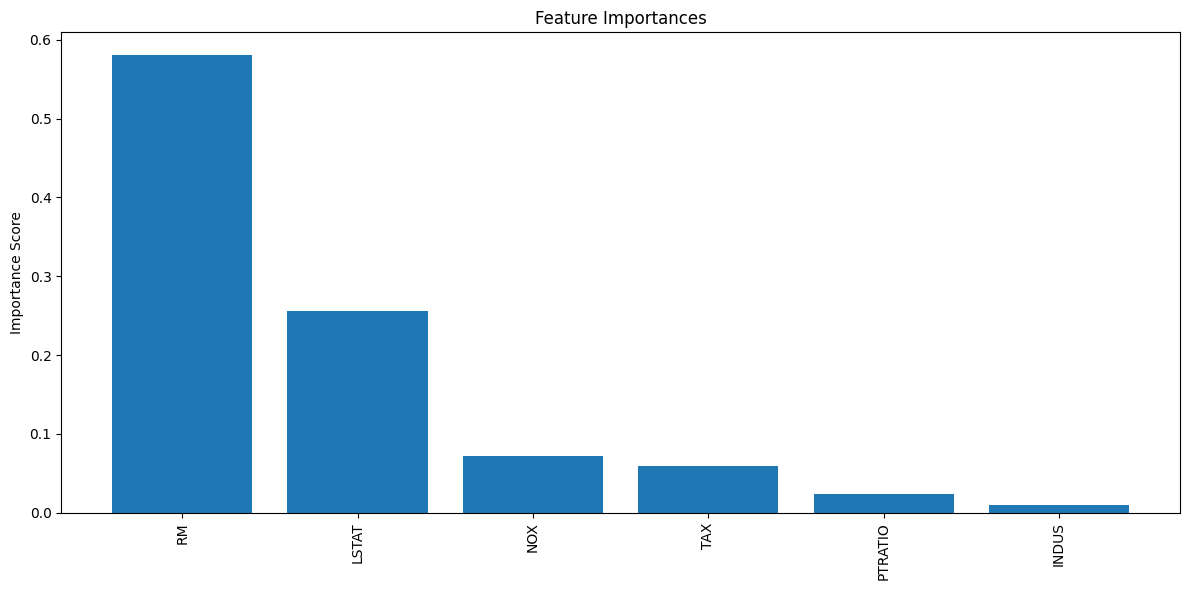

In [30]:
# 7. Feature Importance Visualization
importances = model.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

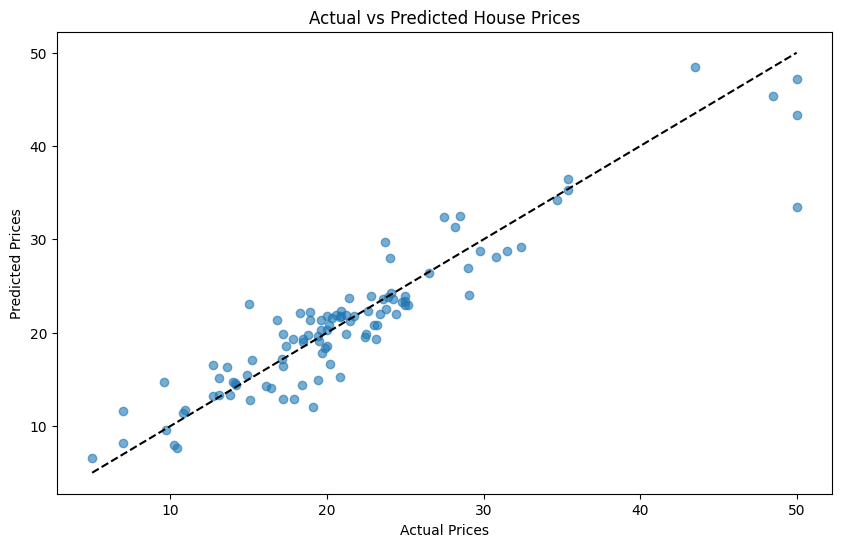

In [31]:
# 8. Actual vs Predicted Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

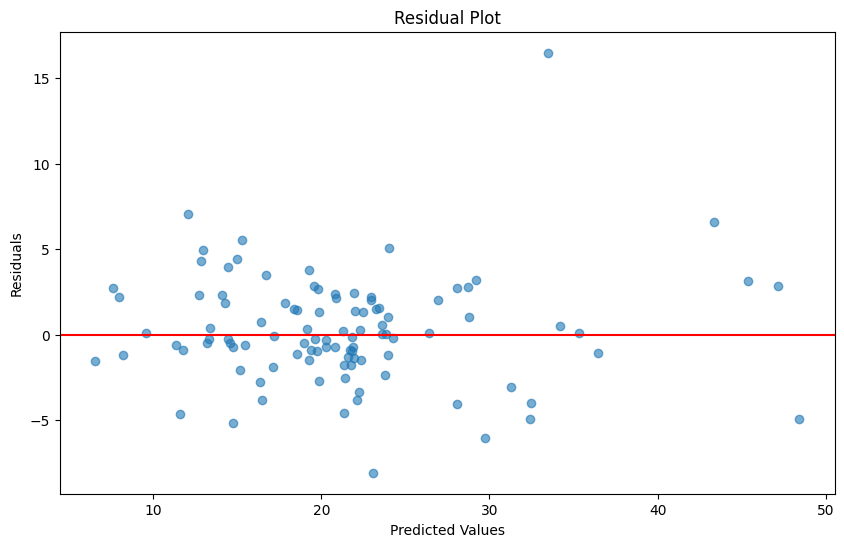

In [32]:
# 9. Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()